# Aprendizaje no supervisado para la identificación de Perfiles Educativos en el ámbito de la Educación Superior en el Ecuador

## Data loading/preprocessing

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Se cargan el archivo de Excel
df_matricula = pd.read_excel("base_matricula_datosabiertos.xlsx", engine='openpyxl')
print(df_matricula.shape)
# Se filtran solo los registros donde "AÑO" de matrícula es igual a 2022
df_matriculas = df_matricula[df_matricula["AÑO"] == 2022]
print(df_matriculas.shape)


(399176, 23)
(140859, 23)


In [17]:
#Se muestra las columnas del conjunto de datos
df_matriculas.columns

Index(['AÑO', 'CODIGO_IES', 'CODIGO_CARRERA', 'TIPO_SEDE', 'PROVINCIA_SEDE',
       'CANTON_SEDE', 'SEXO', 'ETNIA', 'PUEBLOS_NACIONALIDAD', 'DISCAPACIDAD',
       'PAIS_NACIONALIDAD', 'PAIS_RESIDENCIA', 'PROVINCIA_RESIDENCIA',
       'CANTON_RESIDENCIA', 'NOMBRE_IES', 'TIPO_FINANCIAMIENTO',
       'NOMBRE_CARRERA', 'CAMPO_AMPLIO', 'CAMPO_ESPECIFICO', 'CAMPO_DETALLADO',
       'NIVEL_FORMACIÓN', 'MODALIDAD', 'tot'],
      dtype='object')

In [18]:
#Se re etiquetan algunas categorías con nombres demasiado extensos, esto facilita mostrarlas luego en los gráficos.
df_matriculas.loc[:, 'MODALIDAD'] = df_matriculas['MODALIDAD'].replace(['HIBRIDA', 'DUAL'], 'SEMIPRESENCIAL')
df_matriculas.loc[:, 'NIVEL_FORMACIÓN'] = df_matriculas['NIVEL_FORMACIÓN'].replace(['TERCER NIVEL O PREGRADO'], 'PREGRADO')
df_matriculas.loc[:, 'NIVEL_FORMACIÓN'] = df_matriculas['NIVEL_FORMACIÓN'].replace(['CUARTO NIVEL O POSGRADO'], 'POSGRADO')
df_matriculas.loc[:, 'CAMPO_AMPLIO'] = df_matriculas['CAMPO_AMPLIO'].replace(['CIENCIAS SOCIALES, PERIODISMO, INFORMACION Y DERECHO'], 'CIENCIAS SOCIALES Y DERECHO')
df_matriculas.loc[:, 'CAMPO_AMPLIO'] = df_matriculas['CAMPO_AMPLIO'].replace(['AGRICULTURA, SILVICULTURA, PESCA Y VETERINARIA'], 'AGRICULTURA Y VETERINARIA')
df_matriculas.loc[:, 'CAMPO_AMPLIO'] = df_matriculas['CAMPO_AMPLIO'].replace(['CIENCIAS NATURALES, MATEMATICAS Y ESTADISTICA'], 'CIENCIAS NATURALES Y MATEMATICAS')
df_matriculas.loc[:, 'CAMPO_AMPLIO'] = df_matriculas['CAMPO_AMPLIO'].replace(['INGENIERIA, INDUSTRIA Y CONSTRUCCION'], 'INGENIERIA E INDUSTRIA')
df_matriculas.loc[:, 'CAMPO_AMPLIO'] = df_matriculas['CAMPO_AMPLIO'].replace(['TECNOLOGIAS DE LA INFORMACION Y LA COMUNICACION (TIC)'], 'TECNOLOGIAS DE LA INFORMACION')
df_matriculas.loc[:, 'TIPO_FINANCIAMIENTO'] = df_matriculas['TIPO_FINANCIAMIENTO'].replace(['PARTICULAR COFINANCIADA'], 'PARTICULAR')
df_matriculas.loc[:, 'TIPO_FINANCIAMIENTO'] = df_matriculas['TIPO_FINANCIAMIENTO'].replace(['PARTICULAR AUTOFINANCIADA'], 'PARTICULAR')

#Se filtran algunas categorías que no se consideran utiles para el análisis
df_matriculas = df_matriculas[
    (df_matriculas["CAMPO_AMPLIO"] != "NO_REGISTRA") &   #No se considera la categoría "NO_REGISTRA" (10 registros)
    (df_matriculas["PROVINCIA_RESIDENCIA"] != "NO_REGISTRA") &  ##No se considera la categoría "NO_REGISTRA" (810 registros)
    (df_matriculas["PROVINCIA_RESIDENCIA"] != "ZONAS NO DELIMITADAS") &   #No se considera la categoría "ZONAS_NO_DELIMITADAS" (10 registros)
    (df_matriculas["NIVEL_FORMACIÓN"] != "TERCER NIVEL TECNICO-TECNOLOGICO SUPERIOR")  #No se considera la categoría "TERCER NIVEL TECNICO-TECNOLOGICO SUPERIOR" (1431 registros) debido al enfoque del proyecto
]
print("Tamaño después de eliminar registros:", df_matriculas.shape)

Tamaño después de eliminar registros: (138599, 23)


## Exploratory Analysis

<ipython-input-19-df4f8f3e9aeb>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=plot_data, x=column, y='Cantidad de Carreras', palette=palette)
<ipython-input-19-df4f8f3e9aeb>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=plot_data, x=column, y='Cantidad de Carreras', palette=palette)
<ipython-input-19-df4f8f3e9aeb>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=plot_data, x=column, y='Cantidad de Carreras', palette=palette)
<ipython-input-19-df4f8f3e9aeb>:31: FutureWarning: 

Passing `palette` without assigning `hue`

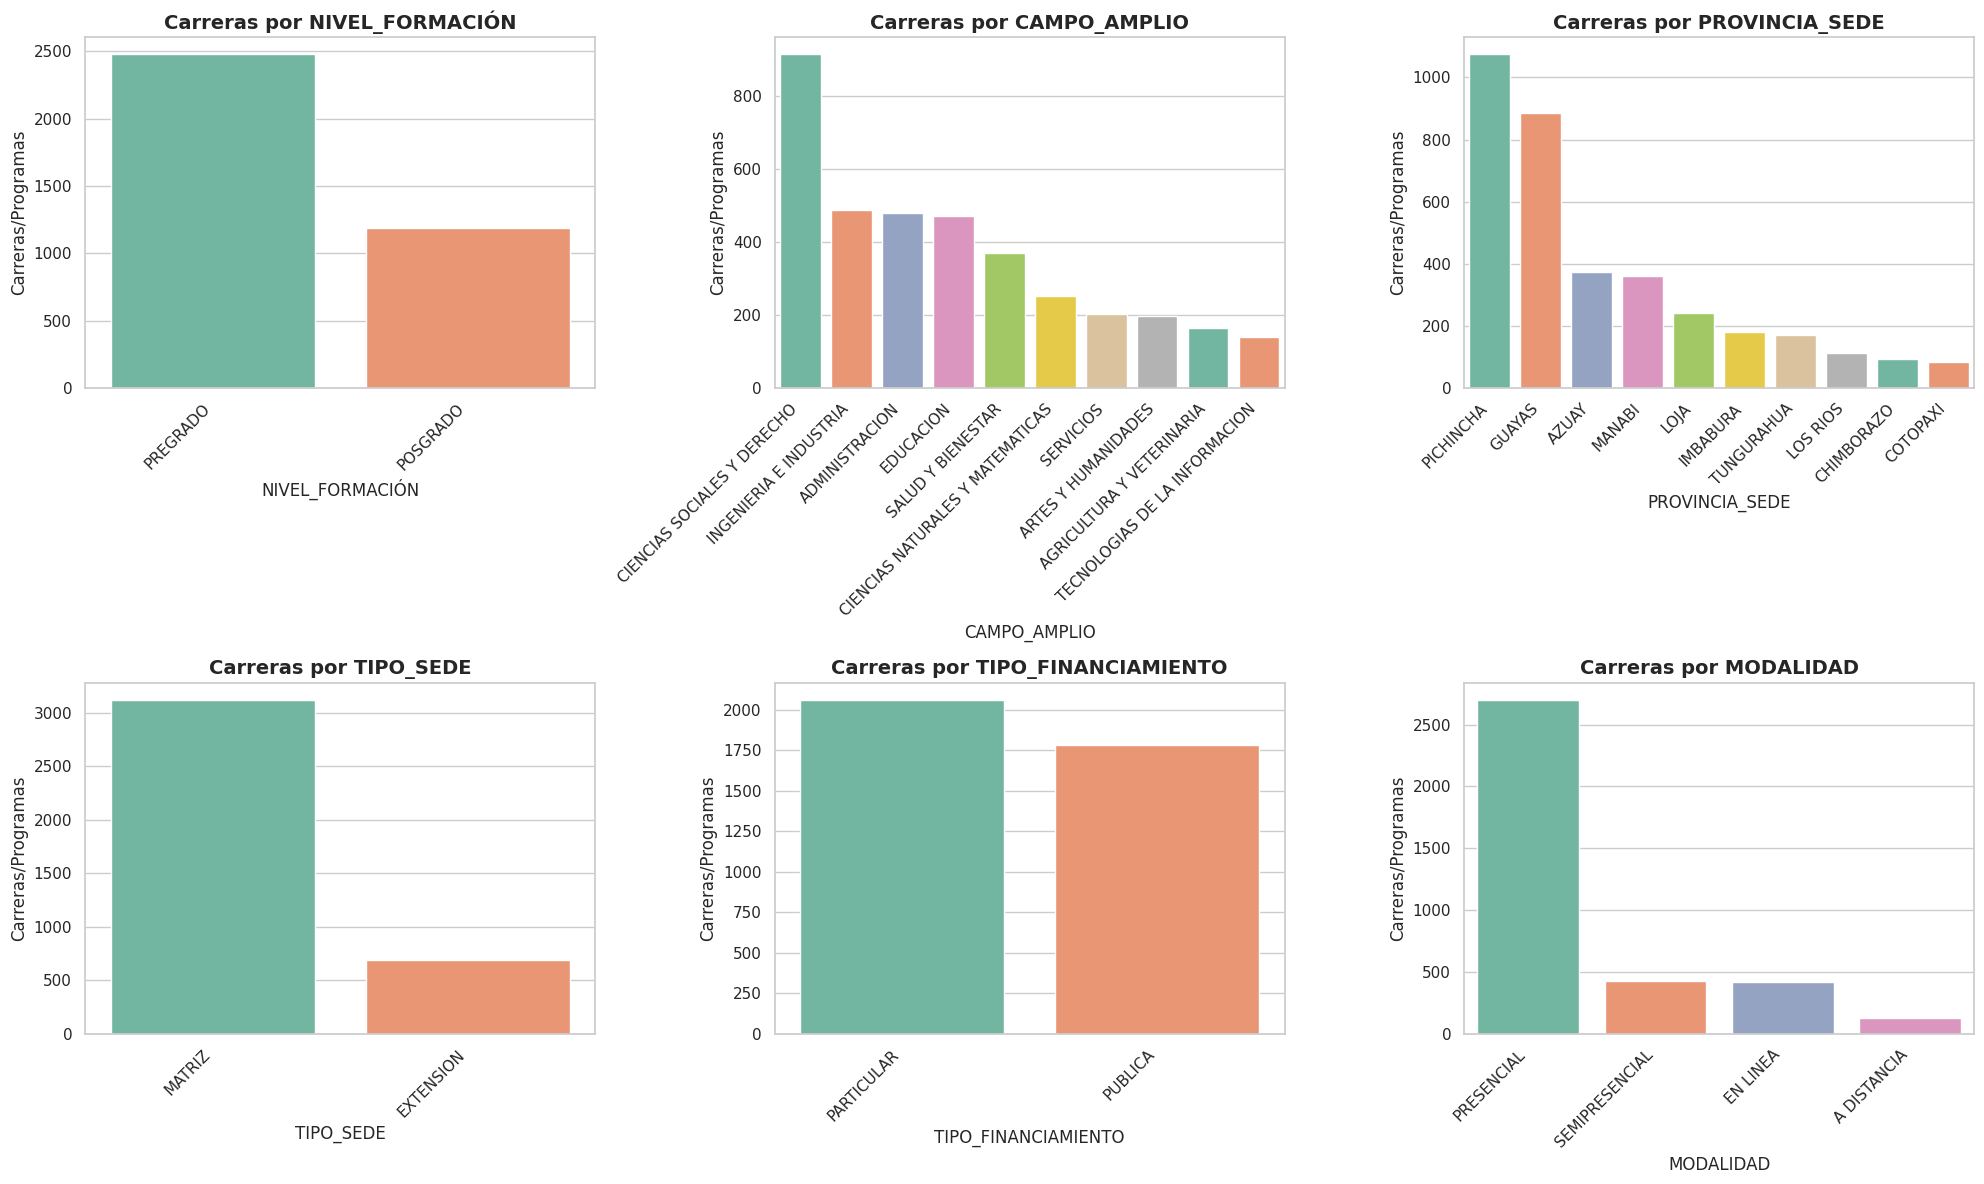

In [19]:
#Distribución de variables categóricas relacionadas a la oferta académica de carreras y programas en el Ecuador, se usa Seaborn

sns.set(style="whitegrid")
# Selección de variables relacionadas con la oferta académica para graficar
categorical_columns = ['NIVEL_FORMACIÓN', 'CAMPO_AMPLIO', 'PROVINCIA_SEDE', 'TIPO_SEDE', 'TIPO_FINANCIAMIENTO', 'MODALIDAD']
total_columns = len(categorical_columns)

# Se ajusta el tamaño de la cuadrícula de subplots según el número de variables
rows = (total_columns // 3) + (total_columns % 3 > 0)
plt.figure(figsize=(20, rows * 6))

# Se crea subgráficos para las columnas categóricas
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(rows, 3, i)  # Aquí se ajusta las filas según el número total de variables
    plot_data = df_matriculas.groupby([column])['CODIGO_CARRERA'].nunique().reset_index()
    plot_data.rename(columns={'CODIGO_CARRERA': 'Cantidad de Carreras'}, inplace=True)
    plot_data.sort_values(by='Cantidad de Carreras', ascending=False, inplace=True)

# Para 'PROVINCIA_SEDE', mostramos solo el top 10 para no saturar el gráfico
    if column == 'PROVINCIA_SEDE':
        plot_data = plot_data.head(10)
# Se selecciona la paleta de colores según el número de categorías
    num_categories = len(plot_data)
    if num_categories <= 10:
        palette = sns.color_palette("Set2", num_categories)
    elif num_categories <= 20:
        palette = sns.color_palette("tab20", num_categories)
    else:
        palette = sns.color_palette("husl", num_categories)
# Se realizan los gráficos de barras para cada variable categórica
    sns.barplot(data=plot_data, x=column, y='Cantidad de Carreras', palette=palette)
    plt.title(f"Carreras por {column}", fontsize=14, weight='bold')
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Carreras/Programas', fontsize=12)
    plt.xticks(rotation=45, ha="right")
# Se ajusta la disposición de los subgráficos para evitar superposición y se muestra el gráfico
plt.tight_layout()
plt.show()


<ipython-input-20-c1344ddf9961>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=plot_data, x=column, y='tot', palette=palette)
<ipython-input-20-c1344ddf9961>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=plot_data, x=column, y='tot', palette=palette)
<ipython-input-20-c1344ddf9961>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=plot_data, x=column, y='tot', palette=palette)
<ipython-input-20-c1344ddf9961>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assi

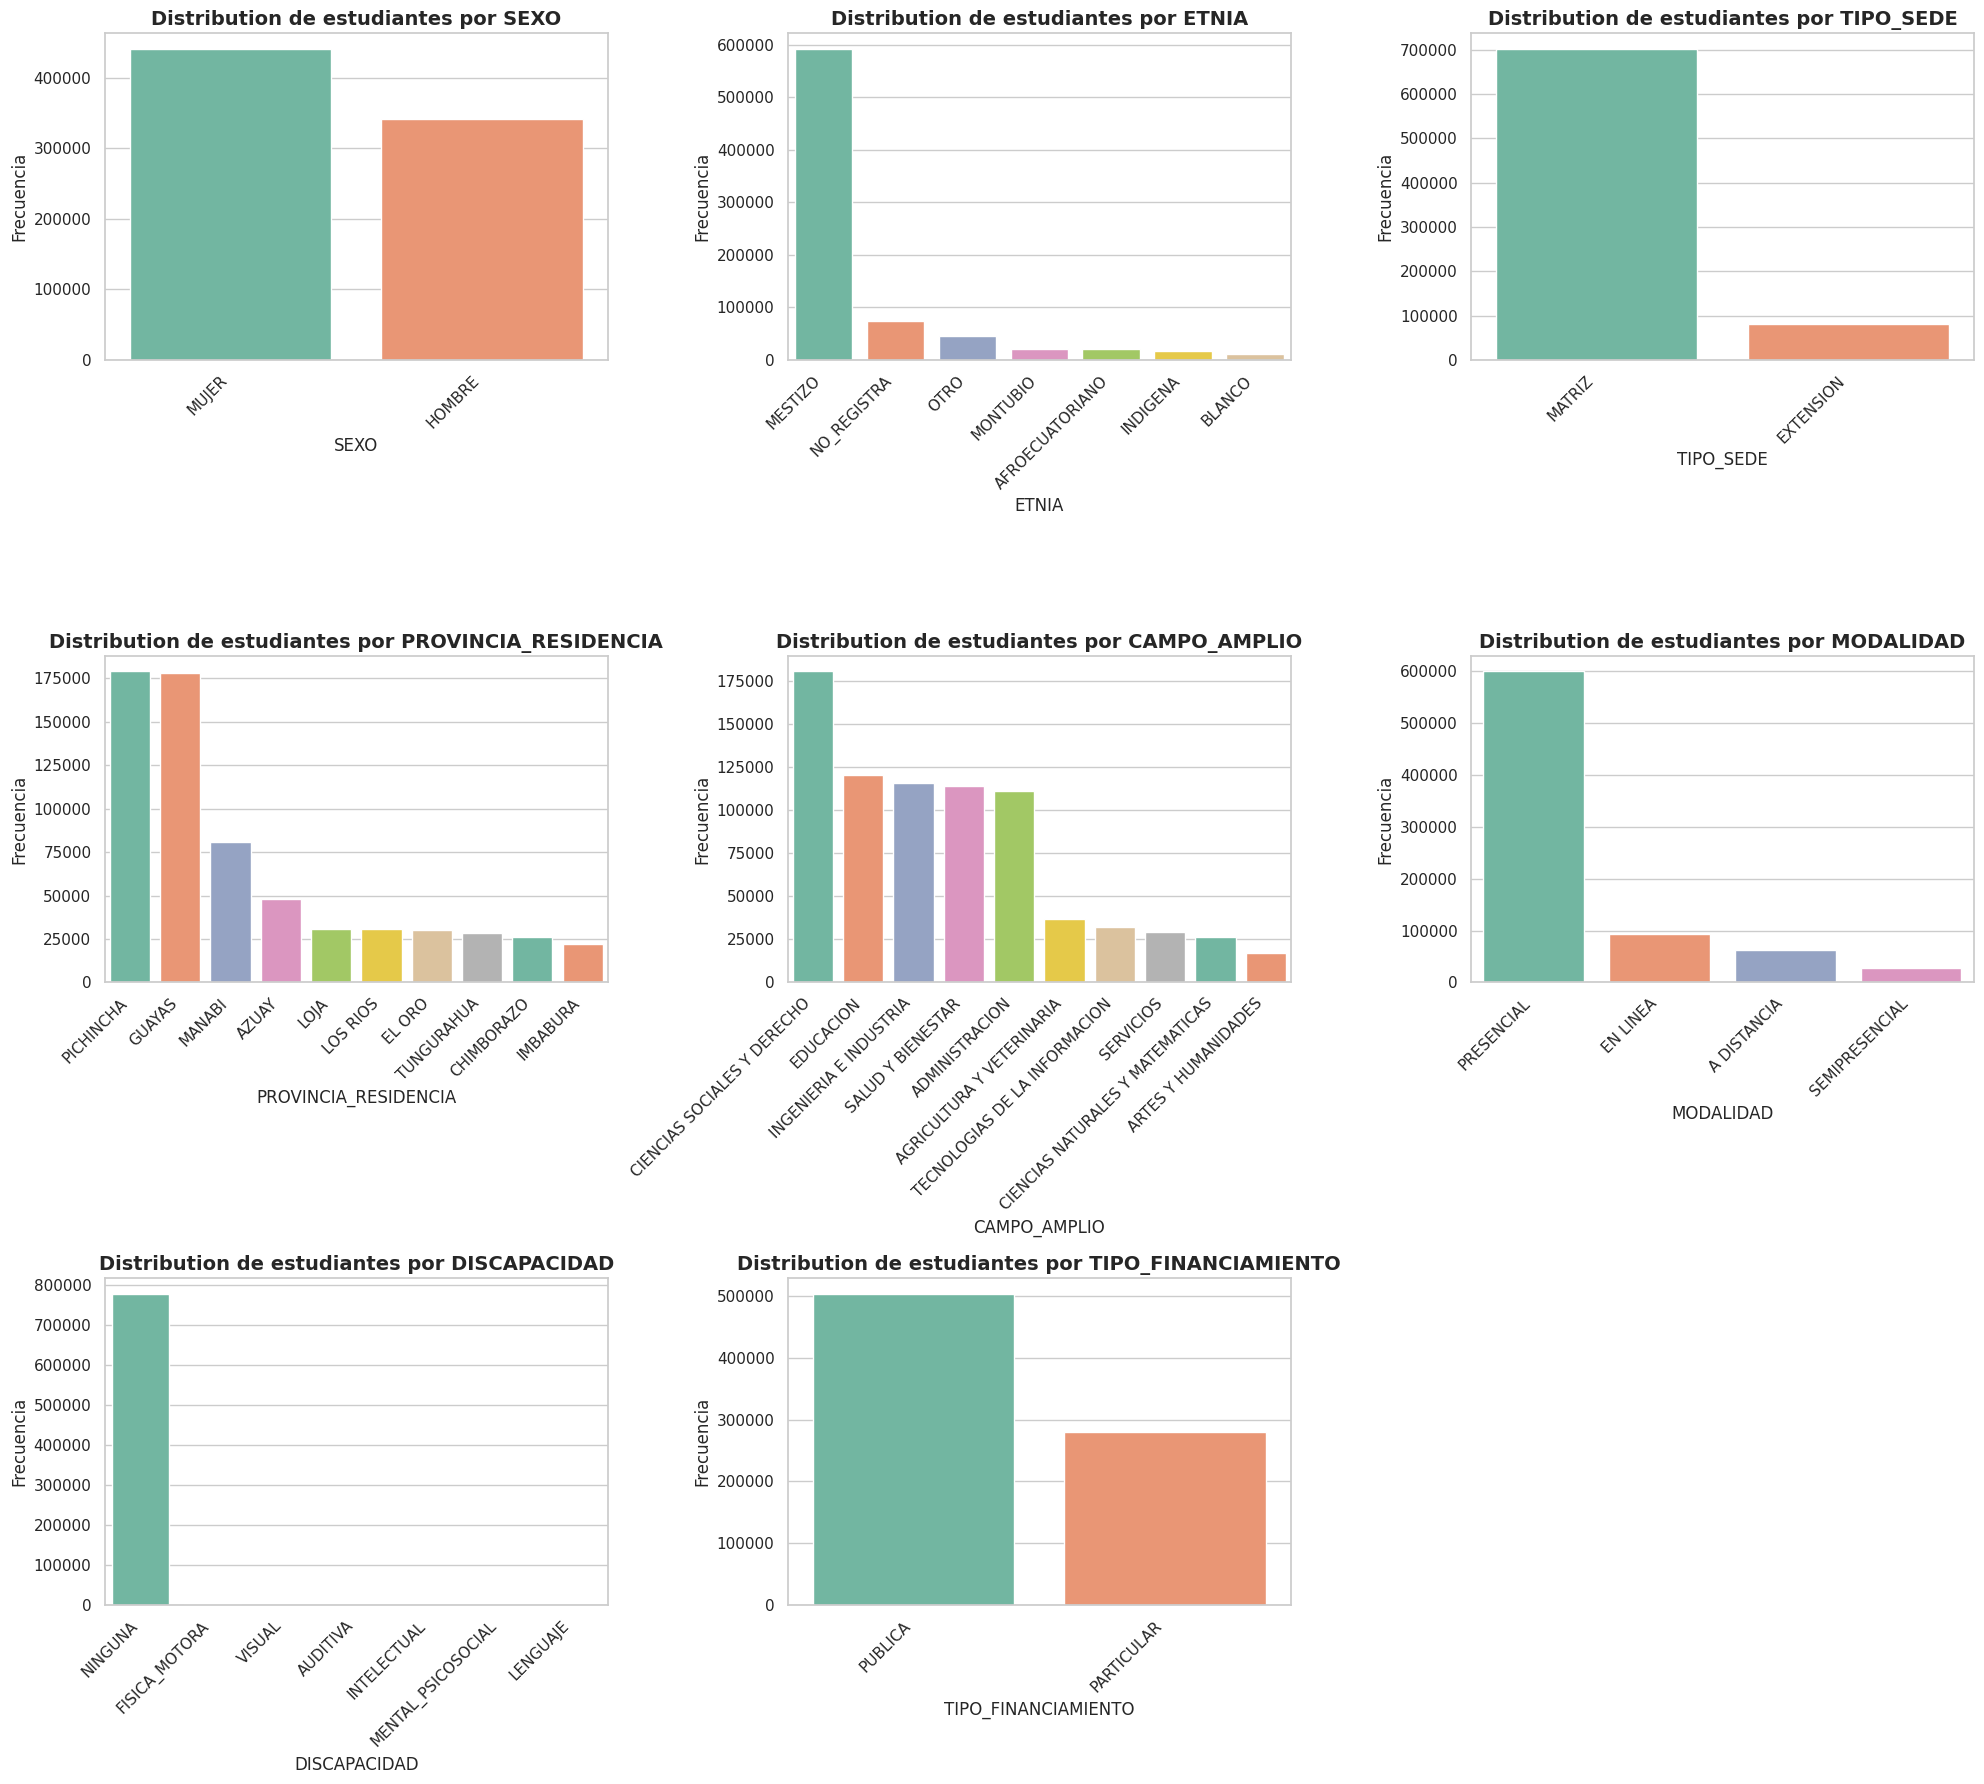

In [20]:
#Distribución de variables categóricas relacionadas a la ditribución de estudiantes matriculados en el Ecuador, se usa Seaborn

sns.set(style="whitegrid")
# Selección de variables relacionadas con las caraterísticas de los estudiantes
categorical_columns = ['SEXO', 'ETNIA', 'TIPO_SEDE', 'PROVINCIA_RESIDENCIA', 'CAMPO_AMPLIO', 'MODALIDAD', 'DISCAPACIDAD', 'TIPO_FINANCIAMIENTO']
total_columns = len(categorical_columns)

# Se ajusta el tamaño de la cuadrícula de subplots según el número de variables
rows = (total_columns // 3) + (total_columns % 3 > 0)
plt.figure(figsize=(20, rows * 6))

# Se crea subgráficos para las columnas categóricas
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(rows, 3, i)  # Aquí se ajusta las filas según el número total de variables
    plot_data = df_matriculas.groupby(column)['tot'].sum().reset_index().sort_values(by='tot', ascending=False)

# Para 'PROVINCIA_RESIDENCIA', mostramos solo el top 10 para no saturar el gráfico
    if column == 'PROVINCIA_RESIDENCIA':
        plot_data = plot_data.head(10)
# Se selecciona la paleta de colores según el número de categorías
    num_categories = len(plot_data)
    if num_categories <= 10:
        palette = sns.color_palette("Set2", num_categories)
    elif num_categories <= 20:
        palette = sns.color_palette("tab20", num_categories)
    else:
        palette = sns.color_palette("husl", num_categories)
# Se realizan los gráficos de barras para cada variable categórica
    sns.barplot(data=plot_data, x=column, y='tot', palette=palette)
    plt.title(f"Distribution de estudiantes por {column}", fontsize=14, weight='bold')
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Frecuencia', fontsize=12)
    plt.xticks(rotation=45, ha="right")
# Se ajusta la disposición de los subgráficos para evitar superposición y se muestra el gráfico
plt.tight_layout()
plt.show()


## Feature selection and Encoding

In [21]:
#Como paso previo se elimina algunas columnas que no son tomadas en cuenta, esto permite visualizar de mejor manera la matriz de Cramers V
#Estas columnas no se consideran para el proceso de clustering debido a que en el caso de 'AÑO' y 'PAIS_RESIDENCIA' no aportan información
# 'tot' se elimina debido a que es una columna de frecuencia que pudiera sesgar los resultados del proceso de clustering
columns_to_drop = [
    'AÑO',   #No aporta en la descripción del set de datos
    'tot',
    'PAIS_RESIDENCIA'  #No aporta en la descripción del set de datos
]
df_matriculas = df_matriculas.drop(columns=columns_to_drop)

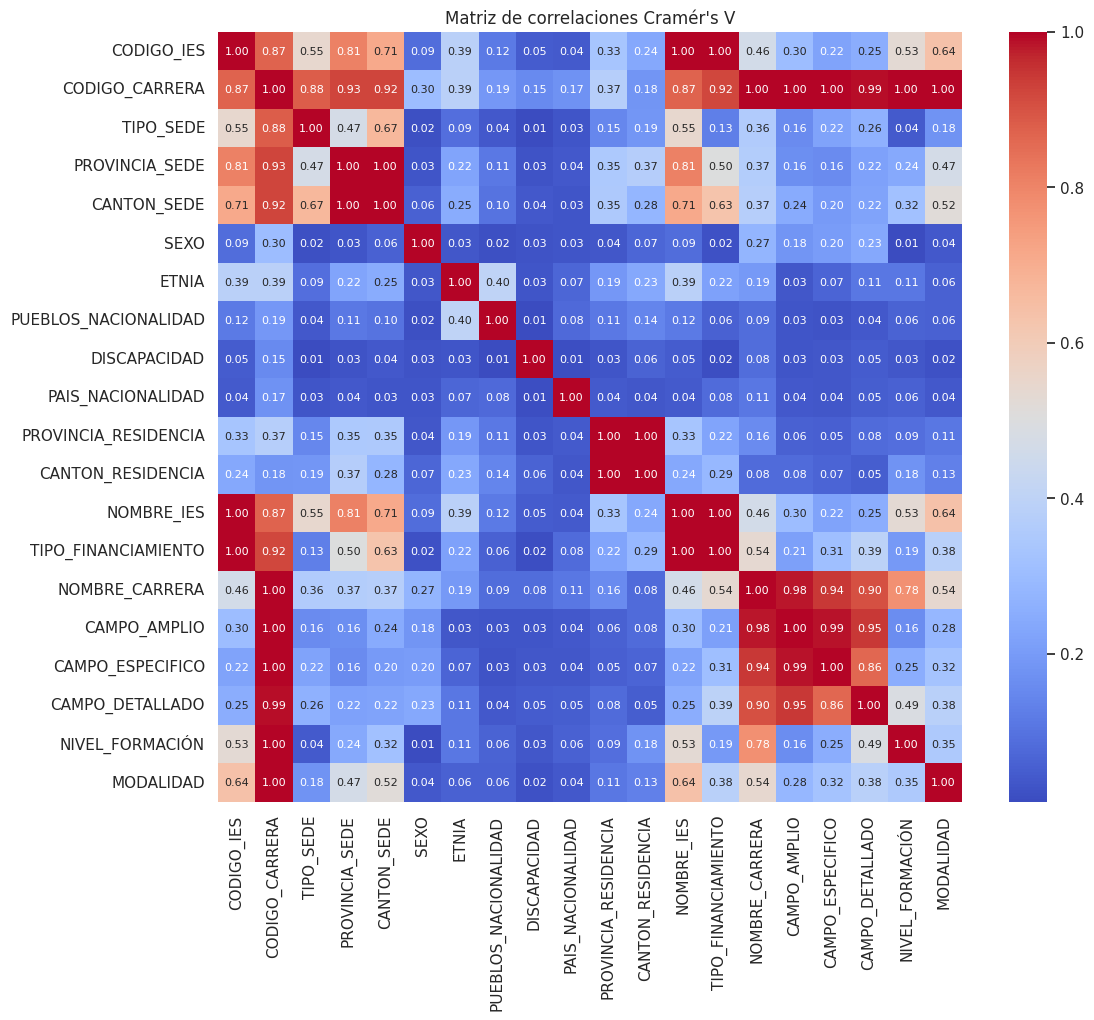

In [22]:
# Cálculo de Cramér's V entre todas las variables categóricas
from scipy.stats import chi2_contingency
# Se define la función cramers_v para calcular la asociación entre las variables categóricas en una matriz de contingencia
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0] # Se usa chi2 para calcular la independencia entre las variables
    n = confusion_matrix.sum().sum()
    return np.sqrt(chi2 / (n * (min(confusion_matrix.shape) - 1)))
# Se crea la matriz de correlación en base a la función cramers_v
corr_matrix = pd.DataFrame(index=df_matriculas.columns, columns=df_matriculas.columns)
for col1 in df_matriculas.columns:
    for col2 in df_matriculas.columns:
        corr_matrix.loc[col1, col2] = cramers_v(df_matriculas[col1], df_matriculas[col2])
# Se convierte la matriz a tipo float y se muestra la matriz usando coolwarm para visualizar zonas de calor
corr_matrix = corr_matrix.astype(float)
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt='.2f', annot_kws={"size": 8}, cbar_kws={'ticks': [0, 0.2, 0.4, 0.6, 0.8, 1]})
plt.title("Matriz de correlaciones Cramér's V")
plt.show()

In [23]:
## Eliminar columnas con alta correlación para evitar redundancias y mejorar el proceso de clustering
# Se crea una copia del dataset original para trabajar sobre él
df_reduced = df_matriculas.copy()
# Se elimina las columnas menos relevantes en base a la matriz de Cramér's V y análisis de las variables desde la experiencia
columns_to_drop = [
    'NOMBRE_CARRERA',       # Redundante con CAMPO_AMPLIO, CAMPO_ESPECIFICO y CAMPO_DETALLADO
    'CAMPO_ESPECIFICO',     # Redundante con CAMPO_AMPLIO y CAMPO_DETALLADO
    'CAMPO_DETALLADO',      # Redundante con CAMPO_ESPECIFICO y CAMPO_AMPLIO
    'CODIGO_CARRERA',       # Redundante con CAMPO_AMPLIO, CAMPO_ESPECIFICO y CAMPO_DETALLADO
    'CANTON_SEDE',          # Redundante con PROVINCIA_SEDE y CODIGO_CARRERA
    'CODIGO_IES',           # Redundante con NOMBRE_IES y TIPO_FINANCIAMIENTO
    'CANTON_RESIDENCIA',    # Redundante con PROVINCIA_RESIDENCIA
    'PUEBLOS_NACIONALIDAD', #La categoría NO_APLICA concentra el 98% de los registros, es decir tiene poca variabilidad
    'NOMBRE_IES',           # Redundante con TIPO_FINANCIAMIENTO y CODIGO_IES
    'DISCAPACIDAD',         #La categoría NINGUNA concentra el 98% de los registros, es decir tiene poca variabilidad
    'PAIS_NACIONALIDAD',    #El 95% de los datos son ecuatorianos, es decir tiene poca variabilidad
    'SEXO',                 #Se uso inicialmente pero no muestra variabilidad en ninguno de los clusters formados, es decir son bastente homogeneos entre hombres y mujeres, por eso se excluye
]
df_reduced = df_reduced.drop(columns=columns_to_drop)
# Ver las columnas que quedan
print("Columnas restantes después de la reducción:")
print(df_reduced.columns)
print(df_reduced.shape)

Columnas restantes después de la reducción:
Index(['TIPO_SEDE', 'PROVINCIA_SEDE', 'ETNIA', 'PROVINCIA_RESIDENCIA',
       'TIPO_FINANCIAMIENTO', 'CAMPO_AMPLIO', 'NIVEL_FORMACIÓN', 'MODALIDAD'],
      dtype='object')
(138599, 8)


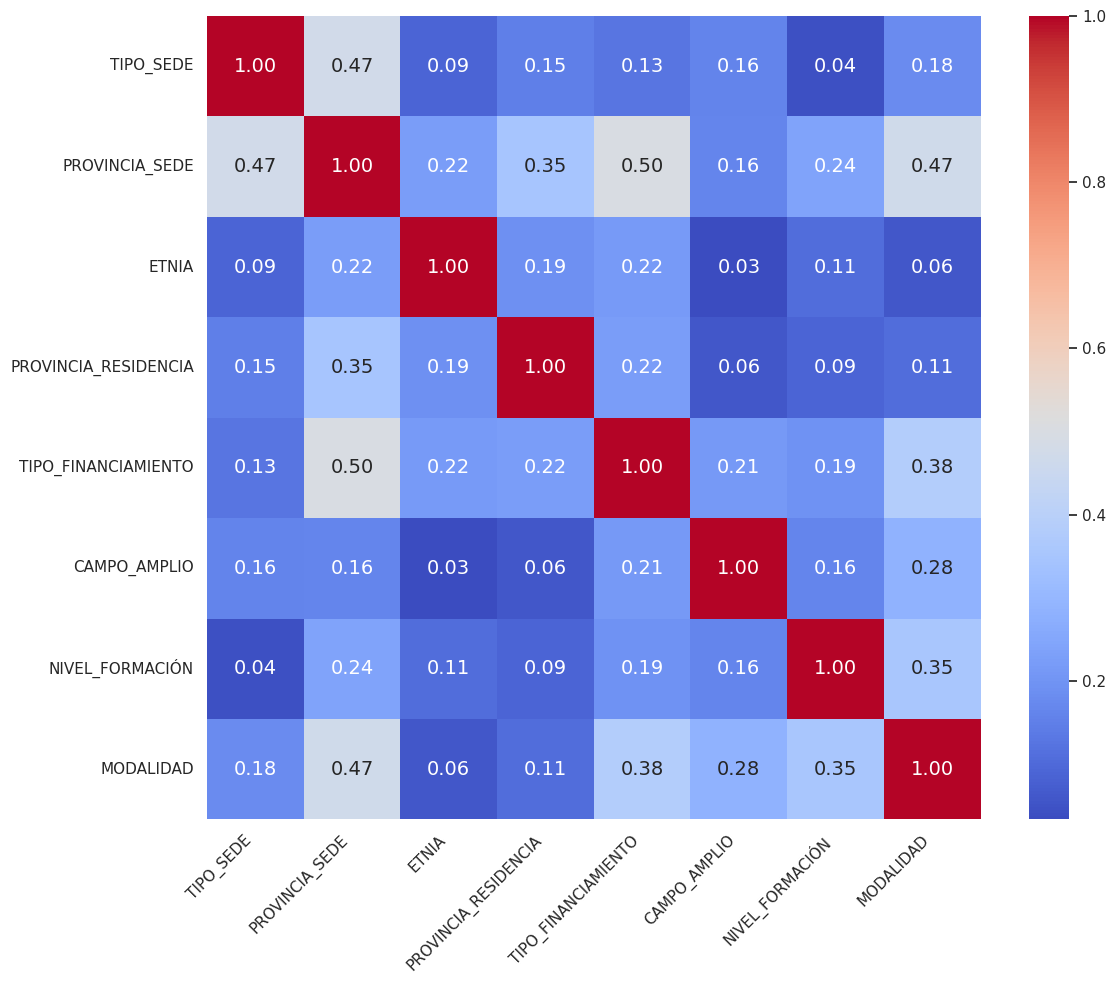

In [24]:
#Se recalcula la matriz de Cramers V con las variables seleccionadas para verificar asociaciones entre las variables
# Función para calcular Cramers V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    return np.sqrt(chi2 / (n * (min(confusion_matrix.shape) - 1)))
# Cálculo de Cramers V entre todas las variables categóricas
corr_matrix = pd.DataFrame(index=df_reduced.columns, columns=df_reduced.columns)
for col1 in df_reduced.columns:
    for col2 in df_reduced.columns:
        corr_matrix.loc[col1, col2] = cramers_v(df_reduced[col1], df_reduced[col2])

# Convertimos la matriz a tipo float y mostramos la matriz
corr_matrix = corr_matrix.astype(float)
plt.figure(figsize=(12, 10))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap="coolwarm",
    fmt='.2f',
    annot_kws={"size": 14},
    cbar_kws={'ticks': [0, 0.2, 0.4, 0.6, 0.8, 1]}
)
plt.xticks(rotation=45, ha='right', fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()  # Asegura que todo el contenido se ajuste dentro de la figura
plt.savefig("matriz_cramers_v.png", format="png", dpi=300) # Guardar la imagen
plt.show()


In [25]:
#Codificación de variables mediante la técnica One Hot Enconder que crea una columna binaria para cada categoría de cada variable
from sklearn.preprocessing import OneHotEncoder

# Se realiz la codifificación OHE del conjunto de datos reducido
encoder = OneHotEncoder(sparse_output=False)  # Configurar OneHotEncoder con salida no esparsa
df_encoded = encoder.fit_transform(df_reduced)
encoded_columns = encoder.get_feature_names_out(df_reduced.columns) # Obtener los nombres de las columnas codificadas para crear el nuevo dataframe
df_encoded = pd.DataFrame(df_encoded, columns=encoded_columns, index=df_reduced.index)
# Se muestra el nuevo dataframe codificado
print(df_encoded.shape)
df_encoded.head()

(138599, 75)


,TIPO_SEDE_EXTENSION,TIPO_SEDE_MATRIZ,PROVINCIA_SEDE_AZUAY,PROVINCIA_SEDE_BOLIVAR,PROVINCIA_SEDE_CARCHI,PROVINCIA_SEDE_CAÑAR,PROVINCIA_SEDE_CHIMBORAZO,PROVINCIA_SEDE_COTOPAXI,PROVINCIA_SEDE_EL ORO,PROVINCIA_SEDE_ESMERALDAS,...,CAMPO_AMPLIO_INGENIERIA E INDUSTRIA,CAMPO_AMPLIO_SALUD Y BIENESTAR,CAMPO_AMPLIO_SERVICIOS,CAMPO_AMPLIO_TECNOLOGIAS DE LA INFORMACION,NIVEL_FORMACIÓN_POSGRADO,NIVEL_FORMACIÓN_PREGRADO,MODALIDAD_A DISTANCIA,MODALIDAD_EN LINEA,MODALIDAD_PRESENCIAL,MODALIDAD_SEMIPRESENCIAL
258317,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
258318,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
258319,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
258320,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
258321,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [26]:
# Se calcula la matriz de correlación de Pearson ahora que se tiene los datos de cada variable como números
correlation_matrix = df_encoded.corr()
# Se filtra las correlaciones mayores a 0.50 o menores a -0.50, excluyendo la diagonal (valores iguales a 1)
filtered_corr = correlation_matrix[(correlation_matrix > 0.50) | (correlation_matrix < -0.50)]
filtered_corr = filtered_corr.where(np.triu(np.ones(filtered_corr.shape), k=1).astype(bool))
# Se obtiene los pares de variables con correlaciones fuertes para mostrarlos
strong_correlations = filtered_corr.stack().reset_index()
strong_correlations.columns = ['Variable 1', 'Variable 2', 'Correlacion']
strong_correlations = strong_correlations.sort_values(by='Correlacion', ascending=False)
strong_correlations

,Variable 1,Variable 2,Correlacion
2,PROVINCIA_SEDE_LOJA,MODALIDAD_A DISTANCIA,0.733167
3,PROVINCIA_SEDE_MANABI,PROVINCIA_RESIDENCIA_MANABI,0.648461
1,PROVINCIA_SEDE_GUAYAS,PROVINCIA_RESIDENCIA_GUAYAS,0.512129
6,MODALIDAD_A DISTANCIA,MODALIDAD_PRESENCIAL,-0.506426
7,MODALIDAD_EN LINEA,MODALIDAD_PRESENCIAL,-0.639286
0,TIPO_SEDE_EXTENSION,TIPO_SEDE_MATRIZ,-1.000000
4,TIPO_FINANCIAMIENTO_PARTICULAR,TIPO_FINANCIAMIENTO_PUBLICA,-1.000000
5,NIVEL_FORMACIÓN_POSGRADO,NIVEL_FORMACIÓN_PREGRADO,-1.000000


In [27]:
# Se elimina las variables que tienen correlación perfecta para reducir dimensionalidad
columns_to_drop = [
                'TIPO_SEDE_EXTENSION',
                'NIVEL_FORMACIÓN_POSGRADO',
                'TIPO_FINANCIAMIENTO_PUBLICA'
]
df_encoded_clean = df_encoded.drop(columns=columns_to_drop, axis=1)
# Se muestra el DataFrame codificado y limpio de variables redundantes
df_encoded_clean

,TIPO_SEDE_MATRIZ,PROVINCIA_SEDE_AZUAY,PROVINCIA_SEDE_BOLIVAR,PROVINCIA_SEDE_CARCHI,PROVINCIA_SEDE_CAÑAR,PROVINCIA_SEDE_CHIMBORAZO,PROVINCIA_SEDE_COTOPAXI,PROVINCIA_SEDE_EL ORO,PROVINCIA_SEDE_ESMERALDAS,PROVINCIA_SEDE_GALAPAGOS,...,CAMPO_AMPLIO_EDUCACION,CAMPO_AMPLIO_INGENIERIA E INDUSTRIA,CAMPO_AMPLIO_SALUD Y BIENESTAR,CAMPO_AMPLIO_SERVICIOS,CAMPO_AMPLIO_TECNOLOGIAS DE LA INFORMACION,NIVEL_FORMACIÓN_PREGRADO,MODALIDAD_A DISTANCIA,MODALIDAD_EN LINEA,MODALIDAD_PRESENCIAL,MODALIDAD_SEMIPRESENCIAL
258317,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
258318,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
258319,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
258320,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
258321,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399171,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
399172,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
399173,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
399174,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [28]:
# Se toma una muestra aleatoria de 70,000 registros que representan alrededor del 50% del total de los datos, esto debido a la capacidad de procesamiento
df_encoded_sample = df_encoded_clean.sample(n=50000, random_state=42)
df_encoded_sample

,TIPO_SEDE_MATRIZ,PROVINCIA_SEDE_AZUAY,PROVINCIA_SEDE_BOLIVAR,PROVINCIA_SEDE_CARCHI,PROVINCIA_SEDE_CAÑAR,PROVINCIA_SEDE_CHIMBORAZO,PROVINCIA_SEDE_COTOPAXI,PROVINCIA_SEDE_EL ORO,PROVINCIA_SEDE_ESMERALDAS,PROVINCIA_SEDE_GALAPAGOS,...,CAMPO_AMPLIO_EDUCACION,CAMPO_AMPLIO_INGENIERIA E INDUSTRIA,CAMPO_AMPLIO_SALUD Y BIENESTAR,CAMPO_AMPLIO_SERVICIOS,CAMPO_AMPLIO_TECNOLOGIAS DE LA INFORMACION,NIVEL_FORMACIÓN_PREGRADO,MODALIDAD_A DISTANCIA,MODALIDAD_EN LINEA,MODALIDAD_PRESENCIAL,MODALIDAD_SEMIPRESENCIAL
371768,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
387124,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
356715,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
274653,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
372088,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383922,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
376338,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
263687,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
364911,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


## Algoritmos de Clustering

### Hierarchical Clustering (Method Average and metric HAMMING)

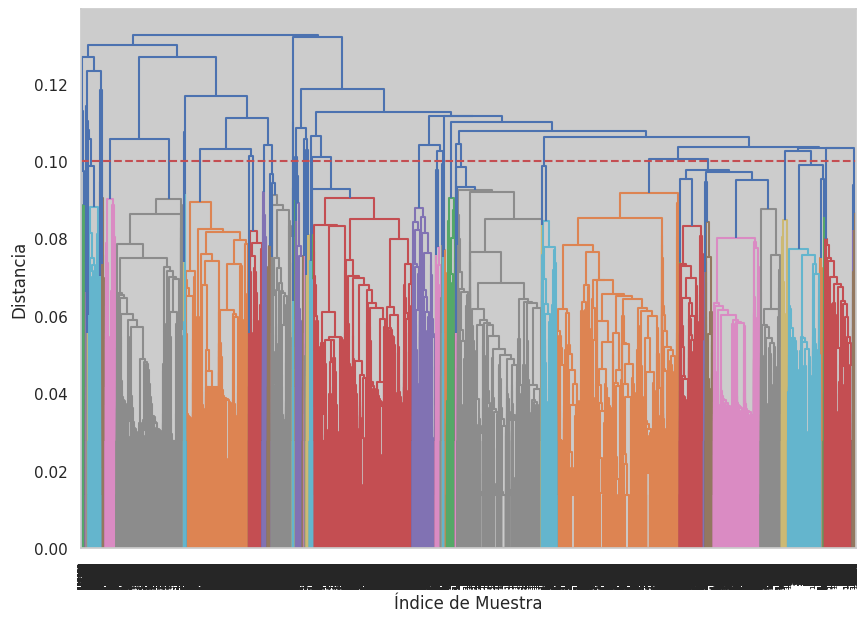

Número de clusters: 43


In [29]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster, cophenet
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# Se calcula la matriz de distancias con 'hamming' sobre ed dataset completo
distance_matrix = pdist(df_encoded_clean, metric='hamming')
# Se usa el método de enlace average  (Se probó también con complete y single)
linkage_matrix = linkage(distance_matrix, method='average')
# Se establece el umbral de corte para que se grafique en el dendograma
altura_corte = 0.10
# Se genera el dendrograma y la línea de corte
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix)
plt.axhline(y=altura_corte, color='r', linestyle='--')  # Línea de corte basada en altura_corte
plt.xlabel('Índice de Muestra')
plt.ylabel('Distancia')
# Guardar el gráfico como archivo antes de mostrarlo
plt.savefig("dendrograma_hamming.png", dpi=300, bbox_inches='tight')
plt.show()
# Se aplicar fcluster para definir los clusters según el umbral de corte
clusters = fcluster(linkage_matrix, altura_corte, criterion='distance')
num_clusters = len(set(clusters))
print(f"Número de clusters: {num_clusters}")

In [32]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_score, calinski_harabasz_score

# Se crea una copia de df_encoded sample para trabajar sobre él
df_encoded_hamming = df_encoded_sample.copy()
# Se calcula la matriz de distancias para el conjunto de datos de sample, esto por capacidad de memoria
dist_matrix_sample = pdist(df_encoded_hamming, metric='hamming')
linkage_matrix_sample = linkage(dist_matrix_sample, method='average')
# Se aplicar fcluster para definir los clusters dentro del conjunto de datos de sample
clusters_sample_hamming = fcluster(linkage_matrix_sample, altura_corte, criterion='distance')
# Se calcula el índice cophenético para evaluar la consistencia del dendrograma
coph_corr, _ = cophenet(linkage_matrix_sample, dist_matrix_sample)
print(f"Índice Cophenético: {coph_corr:.4f}")
# Se calcula el Silhouette Score si hay más de un cluster
if num_clusters > 1:
    silhouette_avg = silhouette_score(df_encoded_hamming, clusters_sample_hamming, metric='hamming')
    print(f"Silhouette Score: {silhouette_avg:.4f}")
else:
    print("No se puede calcular el Silhouette Score porque solo se generó un cluster.")
# Se calcula el Índice de Calinski-Harabasz
if num_clusters > 1:
    calinski_score = calinski_harabasz_score(df_encoded_hamming, clusters_sample_hamming)
    print(f"Calinski-Harabasz Score: {calinski_score:.4f}")
else:
    print("No se puede calcular el Calinski-Harabasz Score porque solo se generó un cluster.")

Índice Cophenético: 0.5891
Silhouette Score: 0.1524
Calinski-Harabasz Score: 662.7389


In [35]:
#Imprimir los clusters con la cantidad de registros
unique_clusters, counts = np.unique(clusters, return_counts=True)
for cluster, count in zip(unique_clusters, counts):
    print(f"Cluster {cluster}: {count} registros")

Cluster 1: 1000 registros
Cluster 2: 1 registros
Cluster 3: 82 registros
Cluster 4: 2 registros
Cluster 5: 109 registros
Cluster 6: 208 registros
Cluster 7: 2035 registros
Cluster 8: 300 registros
Cluster 9: 30 registros
Cluster 10: 693 registros
Cluster 11: 1992 registros
Cluster 12: 12108 registros
Cluster 13: 5 registros
Cluster 14: 111 registros
Cluster 15: 11512 registros
Cluster 16: 6 registros
Cluster 17: 2404 registros
Cluster 18: 962 registros
Cluster 19: 4393 registros
Cluster 20: 28 registros
Cluster 21: 23 registros
Cluster 22: 536 registros
Cluster 23: 1292 registros
Cluster 24: 378 registros
Cluster 25: 226 registros
Cluster 26: 504 registros
Cluster 27: 396 registros
Cluster 28: 5 registros
Cluster 29: 18063 registros
Cluster 30: 4140 registros
Cluster 31: 938 registros
Cluster 32: 337 registros
Cluster 33: 765 registros
Cluster 34: 1553 registros
Cluster 35: 8 registros
Cluster 36: 15354 registros
Cluster 37: 2528 registros
Cluster 38: 22141 registros
Cluster 39: 18330 

In [36]:
#Visualización de los clusters formados con Clustering Jerarquico (Metodo Average y Métrica Hamming)
# Se crea una copia del dataframe y se agrega las etiquetas de clusters
df_clusters_hamming = df_encoded_clean.copy()
df_clusters_hamming['cluster'] = clusters # clusters es la salida del algoritmo
# Se calcula el promedio de las características de cada cluster (Esto debido a que cada característica esta binarizada)
cluster_characteristics = df_clusters_hamming.groupby('cluster').mean()
cluster_sizes = df_clusters_hamming['cluster'].value_counts().sort_index()  # Se calcula la Cantidad de registros en cada cluster
# Se muestran las caracteristicas de cada cluster con su valor promedio y se añade la cantidad de registros como una nueva fila en el DataFrame
cluster_characteristics['size'] = cluster_sizes
# Se selecciona y se muestra las características que son mayores a 0.5 y también las caracteristicas de las cuales se elimino una variable con correlación perfecta
for cluster_id in cluster_characteristics.index:
    print(f"\nCaracterísticas principales del Cluster {cluster_id} (tamaño: {cluster_sizes[cluster_id]}):")
    main_features = cluster_characteristics.loc[cluster_id][(cluster_characteristics.loc[cluster_id] > 0.5)]
    # Agregar las variables de las cuales se elimino su par correlacionado perfectamente, esto es independientemente de si cumplen o no el umbral de 0.5
    specific_features = cluster_characteristics.loc[cluster_id][['TIPO_SEDE_MATRIZ', 'NIVEL_FORMACIÓN_PREGRADO', 'TIPO_FINANCIAMIENTO_PARTICULAR']]
    combined_features_hamming = pd.concat([main_features, specific_features]).drop_duplicates()
    print(combined_features_hamming.sort_values(ascending=False))


Características principales del Cluster 1 (tamaño: 1000):
size                                        1000.000
TIPO_FINANCIAMIENTO_PARTICULAR                 0.998
NIVEL_FORMACIÓN_PREGRADO                       0.913
CAMPO_AMPLIO_CIENCIAS SOCIALES Y DERECHO       0.799
ETNIA_MESTIZO                                  0.757
MODALIDAD_EN LINEA                             0.574
TIPO_SEDE_MATRIZ                               0.000
Name: 1, dtype: float64

Características principales del Cluster 2 (tamaño: 1):
PROVINCIA_SEDE_LOS RIOS    1.0
TIPO_SEDE_MATRIZ           0.0
Name: 2, dtype: float64

Características principales del Cluster 3 (tamaño: 82):
size                              82.000000
ETNIA_MONTUBIO                     0.987805
TIPO_SEDE_MATRIZ                   0.975610
PROVINCIA_SEDE_PICHINCHA           0.890244
MODALIDAD_EN LINEA                 0.548780
TIPO_FINANCIAMIENTO_PARTICULAR     0.439024
NIVEL_FORMACIÓN_PREGRADO           0.365854
Name: 3, dtype: float64

Característica

### KMODES

In [37]:
!pip install kmodes

In [40]:
from kmodes.kmodes import KModes
from sklearn.metrics import silhouette_score
from sklearn.metrics import pairwise_distances
import pandas as pd

# Se asigna el conjunto de datos completo y el df_sample a data_full y data_sample
data_full = df_encoded_clean
data_sample = df_encoded_sample

# Se prueba con 10 y 20 como posibles números de clusters deseados
n_clusters_list = [10, 20]

# Se define la función para hacer fit en K-Modes y calcular métricas, se usa data_sample por costo computacional
def fit_and_evaluate_kmodes(n_clusters, data_sample):
    print(f"\nCalculando métricas para n_clusters = {n_clusters}")
    kmodes_model = KModes(n_clusters=n_clusters, init='Huang', n_init=5, verbose=1)
    clusters_sample = kmodes_model.fit_predict(data_sample)
    # Se evalua el Silhouette Score en la muestra
    dissimilarity_matrix = pairwise_distances(data_sample, metric='hamming')
    silhouette_avg = silhouette_score(dissimilarity_matrix, clusters_sample, metric='precomputed')
    # Se evalua el Calinski-Harabasz Score en la muestra
    ch_score = calinski_harabasz_score(data_sample, clusters_sample)

    return {
        'n_clusters': n_clusters,
        'cost': kmodes_model.cost_,
        'silhouette_score': silhouette_avg,
        'calinski_harabasz_score': ch_score,
        'model': kmodes_model  # Devuelve el modelo ajustado
    }
# Se ejecuta mediante un bucle para los valores deseados de clusters
results = []
models = {}  # Guardar los modelos ajustados para cada k
for n_clusters in n_clusters_list:
    result = fit_and_evaluate_kmodes(n_clusters, df_encoded_sample)
    results.append(result)
    models[n_clusters] = result['model']  # Guardar el modelo ajustado

# Se generan los resultados de las métricas en forma de un dataframe y se muestran
results_df = pd.DataFrame([{
    'n_clusters': r['n_clusters'],
    'cost': r['cost'],
    'silhouette_score': r['silhouette_score'],
    'calinski_harabasz_score': r['calinski_harabasz_score']
} for r in results])
print("\nResultados de las métricas para k = 10 y k = 20:")
print(results_df)



Calculando métricas para n_clusters = 10
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 21994, cost: 190793.0
Run 1, iteration: 2/100, moves: 7831, cost: 185250.0
Run 1, iteration: 3/100, moves: 2629, cost: 185250.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 18214, cost: 184976.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 17654, cost: 180878.0
Run 3, iteration: 2/100, moves: 1737, cost: 180878.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 22325, cost: 180398.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 20492, cost: 185978.0
Run 5, iteration: 2/100, moves: 3509, cost: 186148.0
Best run was number 4

Calculando métricas para n_clusters = 20
Init: initia

In [41]:
# Se configura el modelo K-Modes con k=20
k = 20  # Número de clusters
kmodes_model = KModes(n_clusters=k, init='Cao', n_init=5, verbose=1, random_state=42)
# Se ajusta el modelo y predecir clusters
clusters_km = kmodes_model.fit_predict(df_encoded_clean.values)

# Se añaden los clusters generados al DataFrame completo
df_encoded_clean['Cluster'] = clusters_km
# Se calcula las características promedio y el tamaño de los clusters
cluster_characteristics = df_encoded_clean.groupby('Cluster').mean()
cluster_sizes = df_encoded_clean['Cluster'].value_counts().sort_index()  # Cantidad de registros por cluster
cluster_characteristics['size'] = cluster_sizes
# Se muestrna las características promedio de cada cluster
print("Características promedio de cada cluster:")
print(cluster_characteristics)

# Se definen lascaracterísticas destacadas de cada cluster, se considera un umbral de 0.5
print("\nCaracterísticas principales de cada cluster:")
for cluster_id in cluster_characteristics.index:
    print(f"\nCluster {cluster_id} (tamaño: {int(cluster_sizes[cluster_id])}):")

    # Características principales con promedio > 0.5 (alta ocurrencia)
    main_features = cluster_characteristics.loc[cluster_id][(cluster_characteristics.loc[cluster_id] > 0.5)]

    # Se añade las características específicas de las cuales se elimino su par que tenía correlación inversa perfecta
    specific_features = cluster_characteristics.loc[cluster_id][['TIPO_SEDE_MATRIZ', 'NIVEL_FORMACIÓN_PREGRADO', 'TIPO_FINANCIAMIENTO_PARTICULAR']] if 'TIPO_SEDE_MATRIZ' in cluster_characteristics.columns else pd.Series(dtype='float64')

    # Se combina y se muestran las principales y específicas
    combined_features_km = pd.concat([main_features, specific_features]).drop_duplicates()
    print(combined_features_km.sort_values(ascending=False))


Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 59955, cost: 455131.0
Run 1, iteration: 2/100, moves: 8125, cost: 455131.0
Características promedio de cada cluster:
         TIPO_SEDE_MATRIZ  PROVINCIA_SEDE_AZUAY  PROVINCIA_SEDE_BOLIVAR  \
Cluster                                                                   
0                0.917262              0.042464                0.005747   
1                0.980077              0.077850                0.000000   
2                0.999745              0.000170                0.000000   
3                0.964204              0.063976                0.010663   
4                0.926178              0.055272                0.001704   
5                0.866022              0.035912                0.003913   
6                0.999858              0.000000                0.000000   
7                0.3